# Objectif

- Reprendre l'apprentissage de la dernière séance.
- Elargir à d'autres modèles.(Regarder la partie régression de la documentation de `scikit-learn`).
- Utiliser `GridSearchCV` et `RandomSearchCV` pour sélectionner le meilleur modèle par cross validation.

# Génération échantillon

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Variables globales
# Code limité à un notebook
# Une seule cellule contenant des variables globales
# Tout en majuscule pour bien signaler leur aspect
NB_POINTS = 100
BRUIT = 0.05
A, B = -1.5, 3.

In [18]:
def cible(x):
    return np.exp(1. / (2. + np.sin(5 * x) * np.cos(7 * x)))

In [80]:
X = np.linspace(A, B, NB_POINTS)[:, np.newaxis]
y = (cible(X) * (
    1. + np.random.uniform(
        low=-BRUIT, 
        high=BRUIT, 
        size=X.shape
    )
)).reshape((-1,))

In [81]:
X.shape

(100, 1)

In [82]:
y.shape

(100,)

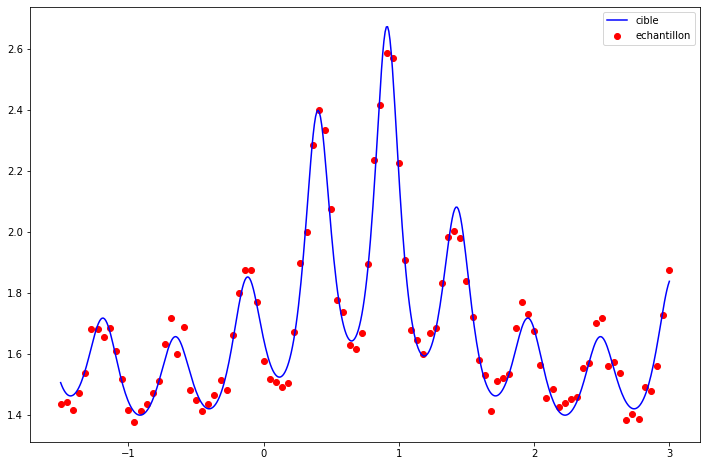

In [20]:
fig, rep = plt.subplots(figsize=(12, 8))
x_aff = np.linspace(A, B, 500)
y_aff = cible(x_aff)
rep.plot(x_aff, y_aff, color="blue", label="cible")
rep.scatter(X, y, color="red", label="echantillon")
rep.legend()

# Apprentissage

In [21]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

## Modèle polynomial

In [83]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

In [23]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", LinearRegression()),
    ]
)

In [24]:
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', LinearRegression())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': LinearRegression(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__copy_X': True,
 'Reg__fit_intercept': True,
 'Reg__n_jobs': None,
 'Reg__normalize': 'deprecated',
 'Reg__positive': False}

In [30]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__fit_intercept": [True, False],
    },
)

In [31]:
g.fit(X_tr, y_tr)

GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', LinearRegression())]),
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 90, 6),
                         'Reg__fit_intercept': [True, False]})

In [32]:
g.best_estimator_

Pipeline(steps=[('Norm', MinMaxScaler(feature_range=(0.0, 1.0))),
                ('Poly', PolynomialFeatures(degree=11)),
                ('Reg', LinearRegression())])

In [38]:
g.best_score_

0.103479192947226

In [33]:
g.score(X_tr, y_tr)

0.5337362904114984

In [34]:
g.score(X_te, y_te)

0.021026620043045563

**Conclusion** Le modèle est clairement en surapprentissage et ne devrait pas être déployé.

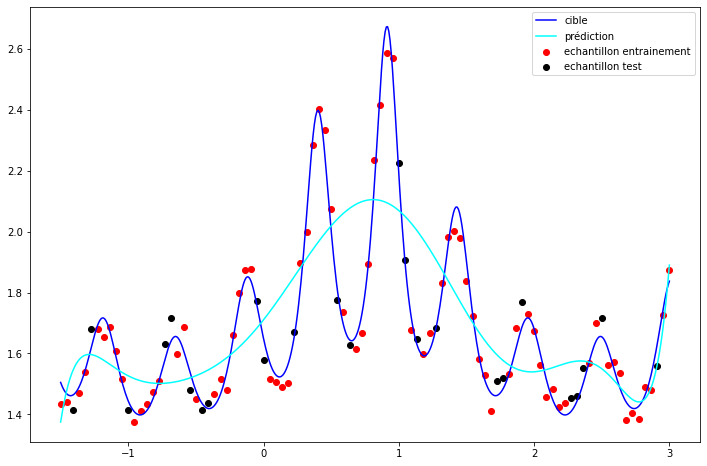

In [36]:
fig, rep = plt.subplots(figsize=(12, 8))
x_aff = np.linspace(A, B, 500)
y_aff = cible(x_aff)
rep.plot(x_aff, y_aff, color="blue", label="cible")
rep.scatter(X_tr, y_tr, color="red", label="echantillon entrainement")
rep.scatter(X_te, y_te, color="black", label="echantillon test")
rep.plot(x_aff, g.predict(x_aff[:, np.newaxis]), color="cyan", label="prédiction")
rep.legend()

## Autres modèles

- Lasso, Ridge, ElasticNet
- SVM
- RandomForestRegressor
- Perceptron

In [50]:
resultats = dict()

In [39]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [40]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", Ridge()),
    ]
)

In [41]:
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', Ridge())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': Ridge(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__alpha': 1.0,
 'Reg__copy_X': True,
 'Reg__fit_intercept': True,
 'Reg__max_iter': None,
 'Reg__normalize': 'deprecated',
 'Reg__positive': False,
 'Reg__random_state': None,
 'Reg__solver': 'auto',
 'Reg__tol': 0.001}

In [44]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__fit_intercept": [True, False],
        "Reg__alpha": [0.01, 0.1, 1., 10.],
        "Reg__solver": ["svd", "lsqr"],
    },
)

In [45]:
g.fit(X_tr, y_tr)

GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', Ridge())]),
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 90, 6),
                         'Reg__alpha': [0.01, 0.1, 1.0, 10.0],
                         'Reg__fit_intercept': [True, False],
                         'Reg__solver': ['svd', 'lsqr']})

In [46]:
g.best_estimator_

Pipeline(steps=[('Norm', MinMaxScaler(feature_range=(-1.5, 3.0))),
                ('Poly', PolynomialFeatures(degree=11)),
                ('Reg', Ridge(alpha=0.1, fit_intercept=False, solver='svd'))])

In [47]:
g.best_score_

0.1565726495801701

In [51]:
resultats["Ridge"] = g

In [52]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", Lasso()),
    ]
)
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', Lasso())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': Lasso(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__alpha': 1.0,
 'Reg__copy_X': True,
 'Reg__fit_intercept': True,
 'Reg__max_iter': 1000,
 'Reg__normalize': 'deprecated',
 'Reg__positive': False,
 'Reg__precompute': False,
 'Reg__random_state': None,
 'Reg__selection': 'cyclic',
 'Reg__tol': 0.0001,
 'Reg__warm_start': False}

In [55]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__fit_intercept": [True, False],
        "Reg__alpha": [0.01, 0.1, 1., 10.],
        "Reg__max_iter": [10000],
    },
)
g.fit(X_tr, y_tr)

/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.765e+00, tolerance: 5.663e-04
  model = cd_fast.enet_coordinate_descent(
/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.611e+00, tolerance: 5.432e-04
  model = cd_fast.enet_coordinate_descent(
/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', Lasso())]),
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 90, 6),
                         'Reg__alpha': [0.01, 0.1, 1.0, 10.0],
                         'Reg__fit_intercept': [True, False],
                         'Reg__max_iter': [10000]})

In [ ]:
resultats["Lasso"] = g

Impossible de faire converger le lasso. On passe à ElasticNet.

In [56]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", ElasticNet()),
    ]
)
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', ElasticNet())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': ElasticNet(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__alpha': 1.0,
 'Reg__copy_X': True,
 'Reg__fit_intercept': True,
 'Reg__l1_ratio': 0.5,
 'Reg__max_iter': 1000,
 'Reg__normalize': 'deprecated',
 'Reg__positive': False,
 'Reg__precompute': False,
 'Reg__random_state': None,
 'Reg__selection': 'cyclic',
 'Reg__tol': 0.0001,
 'Reg__warm_start': False}

In [60]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__fit_intercept": [True, False],
        "Reg__alpha": [0.1, 1., 10.],
        "Reg__l1_ratio": [0.1, 0.5, 0.9],
        "Reg__max_iter": [10000],
    },
    n_jobs=-1,
)
g.fit(X_tr, y_tr)

/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.847e+00, tolerance: 5.663e-04
  model = cd_fast.enet_coordinate_descent(
/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.709e+00, tolerance: 5.432e-04
  model = cd_fast.enet_coordinate_descent(
/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', ElasticNet())]),
             n_jobs=-1,
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 90, 6),
                         'Reg__alpha': [0.1, 1.0, 10.0],
                         'Reg__fit_intercept': [True, False],
                         'Reg__l1_ratio': [0.1, 0.5, 0.9],
                         'Reg__max_iter': [10000]})

In [61]:
resultats["Elastic Net"] = g

Pipeline(steps=[('Norm', MinMaxScaler(feature_range=(-1.5, 3.0))),
                ('Poly', PolynomialFeatures(degree=41)),
                ('Reg', ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=10000))])

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [64]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", SVR()),
    ]
)
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', SVR())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': SVR(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__C': 1.0,
 'Reg__cache_size': 200,
 'Reg__coef0': 0.0,
 'Reg__degree': 3,
 'Reg__epsilon': 0.1,
 'Reg__gamma': 'scale',
 'Reg__kernel': 'rbf',
 'Reg__max_iter': -1,
 'Reg__shrinking': True,
 'Reg__tol': 0.001,
 'Reg__verbose': False}

In [85]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__C": [0.1, 1., 10.],
        "Reg__epsilon": [0.05, 0.1, 0.5],
    },
    n_jobs=-1,
)
g.fit(X_tr, y_tr)

GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', SVR())]),
             n_jobs=-1,
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 90, 6),
                         'Reg__C': [0.1, 1.0, 10.0],
                         'Reg__epsilon': [0.05, 0.1, 0.5]})

In [86]:
resultats["SVR"] = g

In [87]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", RandomForestRegressor()),
    ]
)
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', RandomForestRegressor())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': RandomForestRegressor(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__bootstrap': True,
 'Reg__ccp_alpha': 0.0,
 'Reg__criterion': 'squared_error',
 'Reg__max_depth': None,
 'Reg__max_features': 'auto',
 'Reg__max_leaf_nodes': None,
 'Reg__max_samples': None,
 'Reg__min_impurity_decrease': 0.0,
 'Reg__min_samples_leaf': 1,
 'Reg__min_samples_split': 2,
 'Reg__min_weight_fraction_leaf': 0.0,
 'Reg__n_estimators': 100,
 'Reg__n_jobs': None,
 'Reg__oob_score': False,
 'Reg__random_state': None,
 'Reg__verbose': 0,
 'Reg__warm_start': False}

In [89]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 15, 2),
        "Reg__n_estimators": [50, 100, 150, 200],
    },
    n_jobs=-1,
)
g.fit(X_tr, y_tr)

GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 15, 2),
                         'Reg__n_estimators': [50, 100, 150, 200]})

In [90]:
resultats["RandomForest"] = g

In [91]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", MLPRegressor()),
    ]
)
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', MLPRegressor())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': MLPRegressor(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__activation': 'relu',
 'Reg__alpha': 0.0001,
 'Reg__batch_size': 'auto',
 'Reg__beta_1': 0.9,
 'Reg__beta_2': 0.999,
 'Reg__early_stopping': False,
 'Reg__epsilon': 1e-08,
 'Reg__hidden_layer_sizes': (100,),
 'Reg__learning_rate': 'constant',
 'Reg__learning_rate_init': 0.001,
 'Reg__max_fun': 15000,
 'Reg__max_iter': 200,
 'Reg__momentum': 0.9,
 'Reg__n_iter_no_change': 10,
 'Reg__nesterovs_momentum': True,
 'Reg__power_t': 0.5,
 'Reg__random_state': None,
 'Reg__shuffle': True,
 'Reg__solver': 'adam',
 'Reg__tol': 0.0001,
 'Reg__validation_fraction': 0.1,
 'Reg__verbose': False,
 'Reg__warm_

In [94]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 15, 2),
        'Reg__hidden_layer_sizes': [(100,), (50, 50), (25, 50, 25)],
        "Reg__max_iter": [5000],
    },
    n_jobs=-1,
)
g.fit(X_tr, y_tr)

GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', MLPRegressor())]),
             n_jobs=-1,
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 15, 2),
                         'Reg__hidden_layer_sizes': [(100,), (50, 50),
                                                     (25, 50, 25)],
                         'Reg__max_iter': [5000]})

In [95]:
resultats["Neural Network"] = g

In [97]:
for modele, meilleur in resultats.items():
    print(f"{modele}: score={meilleur.best_score_}")

Ridge: score=0.1565726495801701
SVR: score=0.24522896368113534
RandomForest: score=0.7263806200596925
Neural Network: score=0.2131392040245644


In [98]:
choix = resultats["RandomForest"]

In [99]:
choix.score(X_tr, y_tr)

0.9820176144956121

In [100]:
choix.score(X_te, y_te)

0.8682277329389864

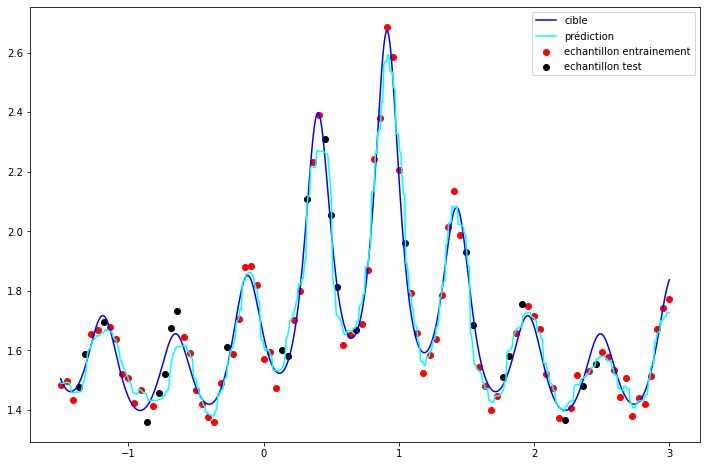

In [101]:
fig, rep = plt.subplots(figsize=(12, 8))
x_aff = np.linspace(A, B, 500)
y_aff = cible(x_aff)
rep.plot(x_aff, y_aff, color="blue", label="cible")
rep.scatter(X_tr, y_tr, color="red", label="echantillon entrainement")
rep.scatter(X_te, y_te, color="black", label="echantillon test")
rep.plot(x_aff, choix.predict(x_aff[:, np.newaxis]), color="cyan", label="prédiction")
rep.legend()